In [1]:
# Sqlite is a library that implements a SQL database engine. 
import sqlite3
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



Bad key text.latex.unicode in file C:\Users\Arvind Maan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\Arvind Maan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\Arvind Maan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
https://githu

In [2]:
#Connection with the data
conn = sqlite3.connect('D:/SQL/database.sqlite')

In [3]:
#sqlite_master is a table with database schema

pd.read_sql(""" SELECT *
                FROM sqlite_master
                WHERE type='table';""",
           conn)

,type,name,tbl_name,rootpage,sql
0,table,Country,Country,2,"CREATE TABLE Country (\n CountryCode TEXT,\..."
1,table,CountryNotes,CountryNotes,186,CREATE TABLE CountryNotes (\n Countrycode T...
2,table,Series,Series,948,"CREATE TABLE Series (\n SeriesCode TEXT,\n ..."
3,table,Indicators,Indicators,4448,CREATE TABLE Indicators (\n CountryName TEX...
4,table,SeriesNotes,SeriesNotes,1317550,CREATE TABLE SeriesNotes (\n Seriescode TEX...
5,table,Footnotes,Footnotes,1317587,CREATE TABLE Footnotes (\n Countrycode TEXT...


#### SQL Retrieving Data from the Tables

**1. SELECT**

In [5]:
pd.read_sql("""SELECT *
               FROM Indicators
               LIMIT 5;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [6]:
#How many rows are present

pd.read_sql("""SELECT COUNT(*)
               FROM Indicators;""",
           conn)

,COUNT(*)
0,5656458


In [7]:
# checking for missing values in one column

pd.read_sql("""SELECT COUNT(*)
               FROM Indicators
               WHERE IndicatorName IS NULL;""",
           conn)

,COUNT(*)
0,0


In [8]:
# checking for missing values in all columns

pd.read_sql("""SELECT COUNT(*) - COUNT(CountryName) AS missing_CountryName,
                      COUNT(*) - COUNT(CountryCode) AS missing_CountryCode,
                      COUNT(*) - COUNT(IndicatorName) AS missing_IndicatorName,
                      COUNT(*) - COUNT(IndicatorCode) AS missing_IndicatorCode, 
                      COUNT(*) - COUNT(Year) AS missing_Year, 
                      COUNT(*) - COUNT(Value) AS missing_Value
                FROM Indicators;""",
           conn)

,missing_CountryName,missing_CountryCode,missing_IndicatorName,missing_IndicatorCode,missing_Year,missing_Value
0,0,0,0,0,0,0


In [9]:
# if I need not null values

pd.read_sql("""SELECT *
               FROM Indicators
               WHERE IndicatorName IS NOT NULL;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
...,...,...,...,...,...,...
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,3.600000e+01
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,9.000000e+01
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,2.420000e+02
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.300000e+00


**2. DISTINCT**

In [11]:
# how many indicator names in the table?

pd.read_sql("""SELECT COUNT (DISTINCT IndicatorName)
                FROM Indicators;""",
           conn)

,COUNT (DISTINCT IndicatorName)
0,1344


In [12]:
# selecting distinct indicators

pd.read_sql("""SELECT DISTINCT IndicatorName
                FROM Indicators;""",
           conn)

,IndicatorName
0,"2005 PPP conversion factor, GDP (LCU per inter..."
1,"2005 PPP conversion factor, private consumptio..."
2,ARI treatment (% of children under 5 taken to ...
3,Access to electricity (% of population)
4,"Access to electricity, rural (% of rural popul..."
...,...
1339,Women's share of population ages 15+ living wi...
1340,"Youth literacy rate, population 15-24 years, b..."
1341,"Youth literacy rate, population 15-24 years, f..."
1342,"Youth literacy rate, population 15-24 years, g..."


### Filtering

In [26]:
#IndicatorName for the countries not started with the letter 'P' and arranged the list as the most recent comes first, then by name in order

pd.read_sql("""SELECT *
               FROM Indicators
               WHERE CountryName NOT LIKE 'P%'
               ORDER BY YEAR DESC, IndicatorName;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Bhutan,BTN,Average time to clear exports through customs ...,IC.CUS.DURS.EX,2015,1.270000e+01
1,West Bank and Gaza,WBG,Bank capital to assets ratio (%),FB.BNK.CAPA.ZS,2015,9.674752e+00
2,Uzbekistan,UZB,Bank capital to assets ratio (%),FB.BNK.CAPA.ZS,2015,1.129908e+01
3,United States,USA,Bank capital to assets ratio (%),FB.BNK.CAPA.ZS,2015,1.162816e+01
4,Ukraine,UKR,Bank capital to assets ratio (%),FB.BNK.CAPA.ZS,2015,7.642274e+00
...,...,...,...,...,...,...
5373692,Central African Republic,CAF,Wholesale price index (2010 = 100),FP.WPI.TOTL,1960,7.526927e+00
5373693,Canada,CAN,Wholesale price index (2010 = 100),FP.WPI.TOTL,1960,1.639533e+01
5373694,Brazil,BRA,Wholesale price index (2010 = 100),FP.WPI.TOTL,1960,2.448357e-13
5373695,Austria,AUT,Wholesale price index (2010 = 100),FP.WPI.TOTL,1960,3.090663e+01


In [13]:
# search for some indicator about GDP

pd.read_sql("""SELECT DISTINCT IndicatorName
               FROM Indicators
               WHERE IndicatorName LIKE 'GDP%';""",
           conn)

,IndicatorName
0,GDP (constant LCU)
1,GDP (current LCU)
2,GDP at market prices (constant 2005 US$)
3,GDP at market prices (current US$)
4,GDP deflator (base year varies by country)
5,GDP growth (annual %)
6,GDP per capita (constant 2005 US$)
7,GDP per capita (constant LCU)
8,GDP per capita (current LCU)
9,GDP per capita (current US$)


In [14]:
# how about GDP per capita of Brazil in last years ?

pd.read_sql(""" SELECT *
                FROM Indicators
                WHERE IndicatorName ='GDP per capita (current US$)'
                AND CountryName = "Brazil"
                AND Year>=2010;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2010,11124.245780
1,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2011,13042.421933
2,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,11922.513058
3,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,11711.004405
4,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,11384.415010


In [15]:
# how about GDP per capita of India in last years ?

pd.read_sql(""" SELECT *
                FROM Indicators
                WHERE IndicatorName ='GDP per capita (current US$)'
                AND CountryName = "India"
                AND Year>=2010;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,India,IND,GDP per capita (current US$),NY.GDP.PCAP.CD,2010,1387.880084
1,India,IND,GDP per capita (current US$),NY.GDP.PCAP.CD,2011,1471.658439
2,India,IND,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,1449.664875
3,India,IND,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,1455.102191
4,India,IND,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,1581.510703


In [16]:
# let's  compare Brazil vs China 

pd.read_sql("""SELECT *
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND (CountryName= 'Brazil' OR CountryName= 'China')
               AND Year>=2010;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2010,11124.245780
1,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2010,4514.940520
2,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2011,13042.421933
3,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2011,5574.187093
4,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,11922.513058
5,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,6264.643878
6,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,11711.004405
7,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,6991.853866
8,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,11384.415010
9,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,7590.016441


In [17]:
# let's check the 90's GDP of China

pd.read_sql("""SELECT * 
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND CountryName='China'
               AND Year BETWEEN 1990 AND 1999;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,1990,316.224430
1,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,1991,331.474916
2,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,1992,364.759664
3,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,1993,375.814294
4,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,1994,471.760881
5,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,1995,607.568583
6,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,1996,707.029771
7,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,1997,778.943906
8,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,1998,825.547957
9,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,1999,869.654882


In [33]:
# let's check other countries GDP in 2014

pd.read_sql("""SELECT *
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND CountryName IN ("China", "Brazil", "Germany")
               AND Year=2013;""",
            conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,11711.004405
1,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,6991.853866
2,Germany,DEU,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,46441.677130


### Aggregation and Summarization

In [23]:
# let's search for the highest GDP per capita in 2014

pd.read_sql("""SELECT CountryName, MAX (Value)
               FROM Indicators
               WHERE IndicatorName = 'GDP per capita (current US$)'
               AND Year = 2013;""",
            conn)

,CountryName,MAX (Value)
0,Luxembourg,113726.638979


In [25]:
#Let's order (and reafirm the highest GDP per capita)

pd.read_sql("""SELECT * 
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND Year= 2013
               ORDER BY Value DESC
               LIMIT 5;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Luxembourg,LUX,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,113726.638979
1,Norway,NOR,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,102832.258690
2,Qatar,QAT,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,96076.996376
3,"Macao SAR, China",MAC,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,90331.819132
4,Bermuda,BMU,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,85748.065414


In [29]:
# Let's compare the averages

pd.read_sql(""" SELECT CountryName, AVG(Value)
                FROM Indicators
                WHERE IndicatorName= 'GDP per capita (current US$)'
                AND CountryName IN ('Brazil', 'China', 'India', 'Pakistan')
                AND Year>2010
                GROUP BY CountryName;""",
           conn)

,CountryName,AVG(Value)
0,Brazil,12015.088601
1,China,6605.175319
2,India,1489.484052
3,Pakistan,1272.293486


### Joins

In [28]:
# let's use a join to get the information about indicators GDP related measured in 2010 in Brazil

pd.read_sql(""" SELECT Indicators.*, Series.LongDefinition
                FROM Indicators
                LEFT JOIN Series 
                ON Indicators.IndicatorName  = Series.IndicatorName
                WHERE Indicators.IndicatorName LIKE 'GDP%'
                AND CountryName ='Brazil'
                AND Year=2014;""",
            conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,LongDefinition
0,Brazil,BRA,GDP (constant LCU),NY.GDP.MKTP.KN,2014,1.872042e+12,GDP is the sum of gross value added by all res...
1,Brazil,BRA,GDP (current LCU),NY.GDP.MKTP.CN,2014,5.521256e+12,GDP at purchaser's prices is the sum of gross ...
2,Brazil,BRA,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,2014,1.206071e+12,None
3,Brazil,BRA,GDP at market prices (current US$),NY.GDP.MKTP.CD,2014,2.346076e+12,None
4,Brazil,BRA,GDP deflator (base year varies by country),NY.GDP.DEFL.ZS,2014,2.949323e+02,The GDP implicit deflator is the ratio of GDP ...
5,Brazil,BRA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,1.447074e-01,Annual percentage growth rate of GDP at market...
6,Brazil,BRA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,5.852500e+03,GDP per capita is gross domestic product divid...
7,Brazil,BRA,GDP per capita (constant LCU),NY.GDP.PCAP.KN,2014,9.084146e+03,GDP per capita is gross domestic product divid...
8,Brazil,BRA,GDP per capita (current LCU),NY.GDP.PCAP.CN,2014,2.679208e+04,GDP per capita is gross domestic product divid...
9,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,1.138442e+04,GDP per capita is gross domestic product divid...


In [30]:
#CO2 emissions in the world

pd.read_sql(""" SELECT Indicators.*, Series.LongDefinition
                FROM Indicators
                LEFT JOIN Series 
                ON Indicators.IndicatorName  = Series.IndicatorName
                WHERE Indicators.IndicatorName LIKE 'CO2%'
                AND CountryName ='World'
                ORDER BY Year DESC
                LIMIT 10;""",
            conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,LongDefinition
0,World,WLD,CO2 emissions from transport (% of total fuel ...,EN.CO2.TRAN.ZS,2012,1.987419e+01,CO2 emissions from transport contains emission...
1,World,WLD,CO2 emissions from residential buildings and c...,EN.CO2.BLDG.ZS,2012,8.516604e+00,CO2 emissions from residential buildings and c...
2,World,WLD,"CO2 emissions from other sectors, excluding re...",EN.CO2.OTHX.ZS,2012,1.877231e+00,"CO2 emissions from other sectors, less residen..."
3,World,WLD,CO2 emissions from manufacturing industries an...,EN.CO2.MANF.ZS,2012,2.107766e+01,CO2 emissions from manufacturing industries an...
4,World,WLD,CO2 emissions from electricity and heat produc...,EN.CO2.ETOT.ZS,2012,4.865408e+01,CO2 emissions from electricity and heat produc...
5,World,WLD,CO2 intensity (kg per kg of oil equivalent ene...,EN.ATM.CO2E.EG.ZS,2011,2.596009e+00,Carbon dioxide emissions from solid fuel consu...
6,World,WLD,CO2 emissions from transport (% of total fuel ...,EN.CO2.TRAN.ZS,2011,1.972732e+01,CO2 emissions from transport contains emission...
7,World,WLD,CO2 emissions from solid fuel consumption (kt),EN.ATM.CO2E.SF.KT,2011,6.453920e+06,Carbon dioxide emissions from solid fuel consu...
8,World,WLD,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,2011,1.862631e+01,Carbon dioxide emissions from solid fuel consu...
9,World,WLD,CO2 emissions from residential buildings and c...,EN.CO2.BLDG.ZS,2011,8.692554e+00,CO2 emissions from residential buildings and c...


### Using CASE WHEN

CASE statements are like "IF this THEN that"

In [34]:
# I'm using arbitrary values, this is an exercise with didactic purposes: cuts on 10000 and 80000
df=pd.read_sql(""" SELECT *,
                   CASE WHEN Value < 10000 THEN 'Low'
                   WHEN Value > 80000 THEN 'High'
                   ELSE 'Medium' END AS Category
                   FROM Indicators
                   WHERE IndicatorName='GDP per capita (current US$)'
                   AND Year=2013;""",
              conn)

C:\Users\Arvind Maan\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


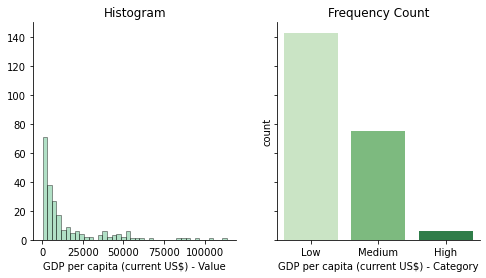

In [35]:
fig, axes= plt.subplots(1,2, figsize=(8,4),sharey=True)

ax1= sns.distplot(df.Value, bins=40, hist_kws={'edgecolor':'k'}, color='mediumseagreen',kde=False,ax=axes[0])
ax1.set_title('Histogram')
ax1.set(xlabel="GDP per capita (current US$) - Value")
ax1= sns.despine()

ax2= sns.countplot(x='Category', data=df, palette="Greens", ax=axes[1])
ax2.set_title('Frequency Count')
ax2.set(xlabel="GDP per capita (current US$) - Category")
ax2= sns.despine();

In [36]:
fig.savefig('eda_sql.png', transparent=True)